In [1]:
import pandas as pd
import numpy as npr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory

%matplotlib inline

### Configuracion para tema oscuro

In [347]:
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                     'xtick.color' : "black",
                     'ytick.color' : "black"})

In [3]:
# Definimos un seed para tener un resultado homogeneo. 
DetectorFactory.seed = 0

In [4]:
detect_langs("Hello. My name is Brain")

[en:0.9999974236121193]

In [5]:
detect("Otec matka syn.")

'pl'

In [6]:
path = '../../data/twitter/train.csv'
tweets = pd.read_csv(path,dtype={'target':'int'})


In [7]:
tweets.sample(10)

,id,keyword,location,text,target
3532,5049,eyewitness,Pennsylvania,A true #TBT Eyewitness News WBRE WYOU http://...,0
3033,4354,earthquake,"California, USA",USGS EQ: M 1.2 - 23km S of Twentynine Palms Ca...,1
2174,3117,debris,In the Shadows,The debris found on Reunion Island was from fl...,1
3011,4325,dust%20storm,A sofa,New Mad Max Screenshots Show Off a Lovely Dust...,0
4623,6571,injury,NaN,incident with injury:I-495 inner loop Exit 31...,1
4541,6455,injured,"Lucknow, India",http://t.co/qr3YPEkfOe \nSeems they declared w...,1
5985,8546,screams,NaN,When you on the phone and @Worstoverdose screa...,0
6677,9568,thunder,London,Okay maybe not as extreme as thunder and light...,0
4030,5722,forest%20fire,"Redding, California, USA",View of smoke column rising above the south en...,1
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1


def translateTargetValue(x):
    if x=='1':
        return True
    elif x=='0':
        return False
    return  x=='1'
   

print(translateTargetValue('1'))

In [8]:
tweets.rename(columns={'target':'veracity'},inplace=True)

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   veracity  7613 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 267.8+ KB


tweets['veracity'] = tweets['veracity'].apply(lambda x : bool(x))

tweets[tweets['veracity']]

tweets[not tweets['veracity']].count()

In [10]:
tweets['lan'] = tweets.text.apply(lambda x :detect(x))

In [11]:
tweets.lan.value_counts()

en    7310
de      58
ca      25
it      21
da      20
sv      19
af      19
no      19
fr      17
nl      14
et      14
tl      10
id       9
sl       9
cy       8
ro       7
es       6
vi       5
so       4
pl       4
pt       3
fi       3
sw       2
sq       2
tr       2
hr       2
sk       1
Name: lan, dtype: int64

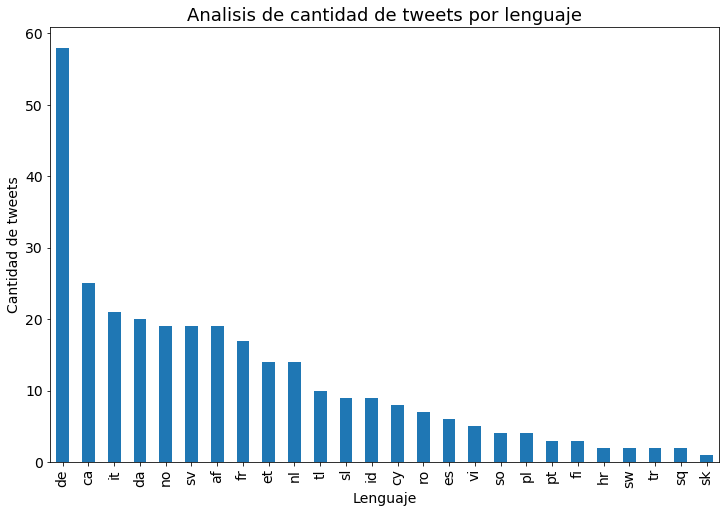

In [348]:
tweets[tweets['lan'] != 'en'].lan.value_counts().plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis de cantidad de tweets por lenguaje',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14);
ax.set_xlabel('Lenguaje',fontsize=14);

In [13]:
tweets[tweets['lan'] != 'en'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 16 to 7530
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        303 non-null    int64 
 1   keyword   295 non-null    object
 2   location  188 non-null    object
 3   text      303 non-null    object
 4   veracity  303 non-null    int32 
 5   lan       303 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 15.4+ KB


### Existe una poca cantidad de tweets que no se puede determinar con exactitud el idioma, esos los quitamos para limpiar el set de datos.

In [14]:
en_tweets = tweets[tweets['lan'] == 'en']

In [15]:
en_tweets.count()

id          7310
keyword     7257
location    4892
text        7310
veracity    7310
lan         7310
dtype: int64

In [16]:
pd.options.display.max_colwidth = 150

In [17]:
en_tweets[en_tweets.keyword.isnull()].count()

id          53
keyword      0
location     0
text        53
veracity    53
lan         53
dtype: int64

en_tweets = en_tweets[en_tweets.keyword.notnull()]

Otra menera de encontrar los null
tweets.loc[tweets.keyword.isnull(),'keyword']

len(tweets.location.unique())

In [18]:
en_tweets_with_keyword = en_tweets.dropna(subset=['keyword'])

In [19]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7257 non-null   int64 
 1   keyword   7257 non-null   object
 2   location  4892 non-null   object
 3   text      7257 non-null   object
 4   veracity  7257 non-null   int32 
 5   lan       7257 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 368.5+ KB


def cond(x,y):
    return True if (x in y) else False 

serie = [tweets_with_keyword.keyword,tweets_with_keyword.text]



serie = np.where(cond, tweets_with_keyword.keyword, tweets_with_keyword.text)
serie = np.select(cond, {tweets_with_keyword.keyword, tweets_with_keyword.text}, default=np.nan)

In [20]:
en_tweets_with_keyword['contains_keyword'] = en_tweets_with_keyword\
    .apply(lambda x: int(x.keyword.lower() in x.text.lower()), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword
7099,10172,violent%20storm,NaN,Storm batters Auckland and Northland: A violent overnight storm has battered Auckland and Northland uprooting... http://t.co/enrPGRgtTs,1,en,0
1621,2341,collapse,Europe,#Greece's tax revenues collapse as debt crisis continues via @guardian #bailout http://t.co/cJvbQXw83s ^mp,1,en,1
3695,5257,fatality,NaN,Death of Loretta Fuddy responsible for authenticating Obama birth certificate the sole fatality of nine on plane http://t.co/MzRhfOJT2j,1,en,1
1843,2649,crashed,Viterbo BFA Acting '18,Heard #SKH on the radio for the first time. Almost crashed the car. @5SOS @Ashton5SOS @Luke5SOS @Michael5SOS @Calum5SOS,1,en,1
4556,6477,injured,NaN,Udhampur terror attack: Militants attack police post 2 SPOs injured: Suspected militants tonight attacked a p... http://t.co/cEKbxJmPBj,1,en,1


tweets_with_keyword[['keyword','text']].sample(20)

In [22]:
en_tweets_with_keyword.contains_keyword.value_counts()

1    5754
0    1503
Name: contains_keyword, dtype: int64

tweets_with_keyword[tweets_with_keyword['contains_keyword'] == False][['keyword','text']]

tweets_with_keyword.contains_keyword

tweets_with_keyword.veracity

tweets_with_keyword[['veracity','contains_keyword']].corr()

tweets_with_keyword['esto'] = serie

tweets_with_keyword.sample(20)


tweets_with_keyword['text']

tweets_with_keyword['contains_keyword'] = tweets_with_keyword['keyword'] in tweets_with_keyword['text']

tweets[tweets.keyword.isnull()]

tweets['contain_keyword'] = tweets[str(tweets.keyword) in str(tweets.text)]

In [23]:
tweets_by_lan = tweets[tweets['lan']!='en'].groupby(['lan']).agg({'lan':['size']})

In [24]:
tweets_by_lan.T

,lan,af,ca,cy,da,de,es,et,fi,fr,hr,...,ro,sk,sl,so,sq,sv,sw,tl,tr,vi
lan,size,19,25,8,20,58,6,14,3,17,2,...,7,1,9,4,2,19,2,10,2,5


level0 = tweets_by_lan.columns.get_level_values(0)

level1 = tweets_by_lan.columns.get_level_values(1)

tweets_by_lan.columns = level0 + '_' + level1

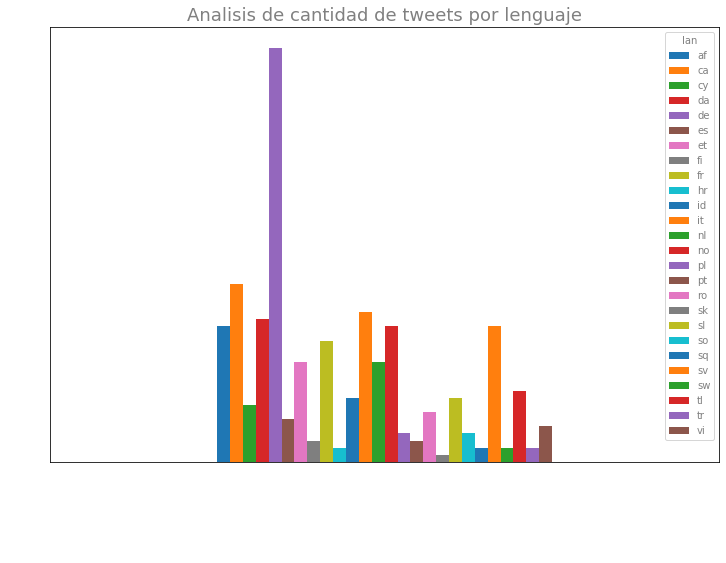

In [25]:
tweets_by_lan.T.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis de cantidad de tweets por lenguaje',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14);
ax.set_xlabel('Lenguaje',fontsize=14);

lan_not_en = (tweets['lan'] == 'en')

real_tweet = tweets['veracity'] == 'Real'

lan_not_en + real_tweet

tweets[tweets.lan != 'en'][tweets.veracity == 'Real']

## Analizar tweets con hashtag '#' menciones '@' links 'http'

In [26]:
int('http' in "https://hasdkja")

1

In [27]:
def containHashtag(text) :
    return '#' in text

In [28]:
en_tweets_with_keyword['hashtag'] = en_tweets_with_keyword.text.apply(lambda x: '#' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
en_tweets_with_keyword.groupby(['hashtag']).agg({'hashtag':['size']})

,hashtag
,size
hashtag,
False,5554
True,1703


In [30]:
en_tweets_with_keyword['link'] = en_tweets_with_keyword.text.apply(lambda x: 'http' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


tweets_with_keyword.text.apply(lambda x: 'http' in x)

In [31]:
en_tweets_with_keyword.groupby(['link']).agg({'veracity':['size']})

,veracity
,size
link,
False,3442
True,3815


In [32]:
en_tweets_with_keyword['arroba'] = en_tweets_with_keyword.text.apply(lambda x: '@' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
en_tweets_with_keyword.groupby(['arroba']).agg({'arroba':['size']})

,arroba
,size
arroba,
False,5321
True,1936


In [34]:
def containAnyReference(text):
    return '@' in text or '#' in text or 'http' in text

In [35]:
containAnyReference("Buenas tardes CoachCMorales")

False

In [36]:
containAnyReference("Buenas tardes @CoachCMorales")

True

In [37]:
containAnyReference("Buenas tardes https://tw.sample")

True

In [38]:
containAnyReference("Buenas tardes #Shini")

True

In [39]:
containAnyReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [40]:
en_tweets_with_keyword['any_reference'] = en_tweets_with_keyword.text.apply(lambda x: containAnyReference(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
en_tweets_with_keyword.groupby(['any_reference']).agg({'any_reference':['size']})

,any_reference
,size
any_reference,
False,1737
True,5520


In [42]:
def containAllReference(text):
    return '@' in text and '#' in text and 'http' in text

In [43]:
containAllReference("Buenas tardes CoachCMorales")

False

In [44]:
containAllReference("Buenas tardes @CoachCMorales")

False

In [45]:
containAllReference("Buenas tardes https://tw.sample")

False

In [46]:
containAllReference("Buenas tardes #Shini")

False

In [47]:
containAllReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [48]:
en_tweets_with_keyword['all_reference'] = en_tweets_with_keyword.text.apply(lambda x: containAllReference(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
en_tweets_with_keyword.groupby(['all_reference']).agg({'all_reference':['size']})

,all_reference
,size
all_reference,
False,7057
True,200


In [50]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['all_reference']].count()

id                  81
keyword             81
location            58
text                81
veracity            81
lan                 81
contains_keyword    81
hashtag             81
link                81
arroba              81
any_reference       81
all_reference       81
dtype: int64

In [51]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['link']].count()

id                  2100
keyword             2100
location            1435
text                2100
veracity            2100
lan                 2100
contains_keyword    2100
hashtag             2100
link                2100
arroba              2100
any_reference       2100
all_reference       2100
dtype: int64

In [52]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['arroba']].count()

id                  654
keyword             654
location            471
text                654
veracity            654
lan                 654
contains_keyword    654
hashtag             654
link                654
arroba              654
any_reference       654
all_reference       654
dtype: int64

In [53]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['hashtag']].count()

id                  839
keyword             839
location            591
text                839
veracity            839
lan                 839
contains_keyword    839
hashtag             839
link                839
arroba              839
any_reference       839
all_reference       839
dtype: int64

en_tweets_with_keyword[tweets_with_keyword['veracity'] & en_tweets_with_keyword['any_reference']].count()

In [54]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7257 non-null   int64 
 1   keyword           7257 non-null   object
 2   location          4892 non-null   object
 3   text              7257 non-null   object
 4   veracity          7257 non-null   int32 
 5   lan               7257 non-null   object
 6   contains_keyword  7257 non-null   int64 
 7   hashtag           7257 non-null   bool  
 8   link              7257 non-null   bool  
 9   arroba            7257 non-null   bool  
 10  any_reference     7257 non-null   bool  
 11  all_reference     7257 non-null   bool  
dtypes: bool(5), int32(1), int64(2), object(4)
memory usage: 780.6+ KB


In [55]:
len(en_tweets_with_keyword.location.unique())

3222

##### Agregamos una columna con la longitud de los tweets

In [56]:
en_tweets_with_keyword['tweets_length'] = en_tweets_with_keyword['text'].apply(lambda x : len(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
7457,10672,wounds,"Wales, United Kingdom",@BritishBakeOff This has opened up old baked alaskan shaped wounds. Too soon GBBO too soon... #neverforget,0,en,1,True,False,True,True,False,106
7283,10423,whirlwind,Pittsburgh,reap the whirlwind,0,en,1,False,False,False,False,False,18
3817,5425,first%20responders,NaN,Carmike Cinemas on Antioch Shooting: 'We Are Grateful' for Staff and First Responders Safety Is 'Highest Priority' http://t.co/BehfHspPud,1,en,0,False,True,False,True,False,137
1394,2012,casualties,NaN,Another movie theater attack..close to home this time. Thankful for no casualties. Life will go on because we cannot allow evil to win!,1,en,1,False,False,False,False,False,135
4697,6678,landslide,Edinburgh,@CrowtherJohn @Effiedeans you just keep ur head in the sand john. The best place for it. Lbr after 97 landslide. Couldnt imagine situ now,0,en,1,False,False,True,True,False,139


In [58]:
en_tweets_with_keyword['tweets_length']

31       55
32       67
33       82
34       34
35       76
       ... 
7578     48
7579    107
7580     93
7581    104
7582     80
Name: tweets_length, Length: 7257, dtype: int64

In [59]:
mean_twetts_with_keyword = en_tweets_with_keyword['tweets_length'].mean()

In [60]:
std_tweets_length_keyword = en_tweets_with_keyword['tweets_length'].std()

In [61]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,tweets_length
count,7257.000000,7257.000000,7257.000000,7257.000000
mean,5438.943365,0.433788,0.792890,102.975472
std,3104.870949,0.495631,0.405263,32.357604
min,48.000000,0.000000,0.000000,7.000000
25%,2766.000000,0.000000,1.000000,80.000000
50%,5380.000000,0.000000,1.000000,109.000000
75%,8098.000000,1.000000,1.000000,134.000000
max,10834.000000,1.000000,1.000000,157.000000


en_tweets_with_keyword['tweets_length'] = en_tweets_with_keyword.tweets_length\
        .apply(lambda x : (x - mean_twetts_with_keyword) / std_tweets_length_keyword )

In [62]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,tweets_length
count,7257.000000,7257.000000,7257.000000,7257.000000
mean,5438.943365,0.433788,0.792890,102.975472
std,3104.870949,0.495631,0.405263,32.357604
min,48.000000,0.000000,0.000000,7.000000
25%,2766.000000,0.000000,1.000000,80.000000
50%,5380.000000,0.000000,1.000000,109.000000
75%,8098.000000,1.000000,1.000000,134.000000
max,10834.000000,1.000000,1.000000,157.000000


In [63]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
3806,5408,fire%20truck,NaN,Former Township fire truck being used in Philippines - Langley Times http://t.co/iMiLsFxntf #filipino,0,en,0,True,True,False,True,False,101
6698,9595,thunder,??,Oh shit its rly sheeting\nAaaaaand there's the thunder and lightning\nI missed summer storms,1,en,1,False,False,False,False,False,90
5167,7369,obliterate,UK,Know them recognize them......then obliterate them! \n#gym #gymflow #gymtime #team #assassinsÛ_ https://t.co/mUHj8CbdQb,0,en,1,True,True,False,True,False,119
126,182,aftershock,304,'The only thing that stands between you and your dream is the will to try and the belief that it is actually possible.' - Joel Brown,0,en,0,False,False,False,False,False,132
2544,3650,destroy,"Virginia, USA",destroy the free fandom honestly,1,en,1,False,False,False,False,False,32


veracity	contains_keyword	hashtag	link	arroba	any_reference	all_reference

In [64]:
en_tweets_with_keyword['veracity'] = en_tweets_with_keyword.veracity.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
en_tweets_with_keyword['contains_keyword'] = en_tweets_with_keyword.contains_keyword.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
en_tweets_with_keyword['hashtag'] = en_tweets_with_keyword.hashtag.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
en_tweets_with_keyword['link'] = en_tweets_with_keyword.link.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
en_tweets_with_keyword['arroba'] = en_tweets_with_keyword.arroba.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
en_tweets_with_keyword['any_reference'] = en_tweets_with_keyword.any_reference.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
en_tweets_with_keyword['all_reference'] = en_tweets_with_keyword.all_reference.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [411]:
sumTweetswithReference = en_tweets_with_keyword.groupby(['veracity']).\
agg({'all_reference':['sum'],
     'arroba':['sum'],
     'contains_keyword':['sum'],
     'hashtag':['sum'],
     'link':['sum'],
     'any_reference':['sum']
    })

In [412]:
level0 = sumTweetswithReference.columns.get_level_values(0)

In [413]:
level1 = sumTweetswithReference.columns.get_level_values(1)

In [419]:
sumTweetswithReference.columns = level0

In [420]:
sumTweetswithReferenceTranspose = sumTweetswithReference.T

In [421]:
sumTweetswithReferenceTranspose

veracity,0,1
all_reference,119,81
arroba,1282,654
contains_keyword,3360,2394
hashtag,864,839
link,1715,2100
any_reference,2862,2658


In [422]:
sumTweetswithReferenceTranspose.columns = ['Falso','Verdadero']

Text(0.5, 0, 'Tipo de referencia')

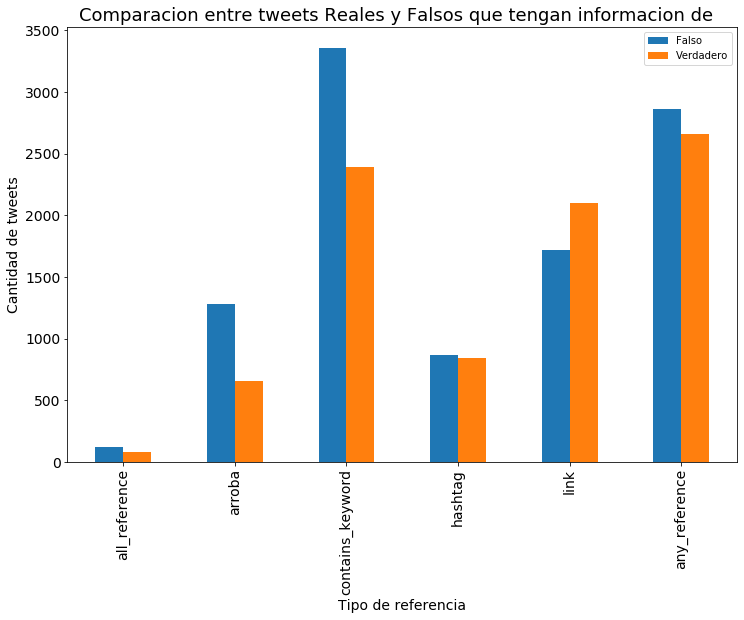

In [423]:
sumTweetswithReferenceTranspose.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Comparacion entre tweets Reales y Falsos que tengan informacion de  ',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
ax.set_xlabel('Tipo de referencia',fontsize=14)


In [71]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7257 non-null   int64 
 1   keyword           7257 non-null   object
 2   location          4892 non-null   object
 3   text              7257 non-null   object
 4   veracity          7257 non-null   int32 
 5   lan               7257 non-null   object
 6   contains_keyword  7257 non-null   int32 
 7   hashtag           7257 non-null   int32 
 8   link              7257 non-null   int32 
 9   arroba            7257 non-null   int32 
 10  any_reference     7257 non-null   int32 
 11  all_reference     7257 non-null   int32 
 12  tweets_length     7257 non-null   int64 
dtypes: int32(7), int64(2), object(4)
memory usage: 915.3+ KB


In [72]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
count,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000
mean,5438.943365,0.433788,0.792890,0.234670,0.525699,0.266777,0.760645,0.027560,102.975472
std,3104.870949,0.495631,0.405263,0.423822,0.499374,0.442305,0.426719,0.163719,32.357604
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2766.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000
50%,5380.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,109.000000
75%,8098.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,134.000000
max,10834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,157.000000


In [73]:
numeric_values_tweets = en_tweets_with_keyword[['veracity','contains_keyword','hashtag','link','arroba','any_reference','all_reference','tweets_length']]

In [74]:
numeric_values_tweets.sample(5)

,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
1713,1,1,0,1,0,1,0,73
5824,1,1,0,1,0,1,0,131
884,0,1,0,1,0,1,0,70
1428,0,1,1,1,0,1,0,139
1788,1,1,1,1,0,1,0,95


plt.colorbar?

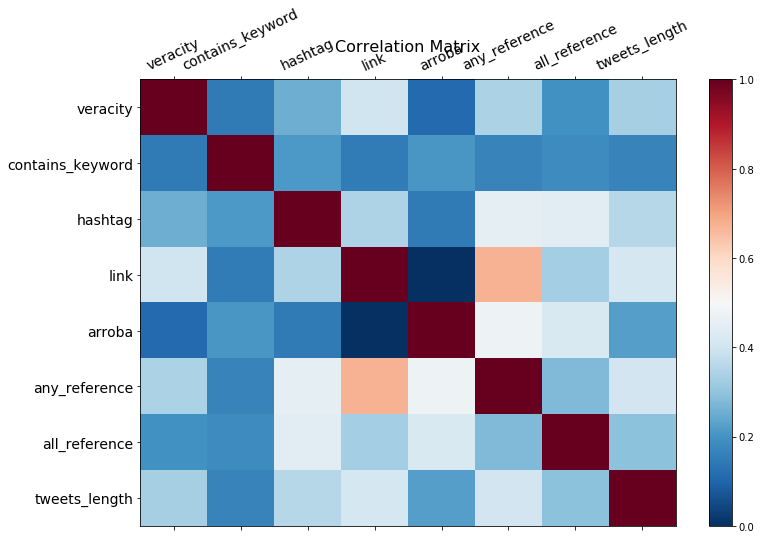

In [427]:
f = plt.figure(figsize=(12,8))
plt.matshow(numeric_values_tweets.corr(), fignum=f.number)
plt.xticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14, rotation=25)
plt.yticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14)
my_cmap2=sns.diverging_palette(170, 250, as_cmap=True)

cb = plt.colorbar(cm.ScalarMappable(cmap='RdBu_r'))
plt.imshow(numeric_values_tweets.corr(),aspect='auto',cmap='RdBu_r')                   
plt.title('Correlation Matrix', fontsize=16);
plt.show()


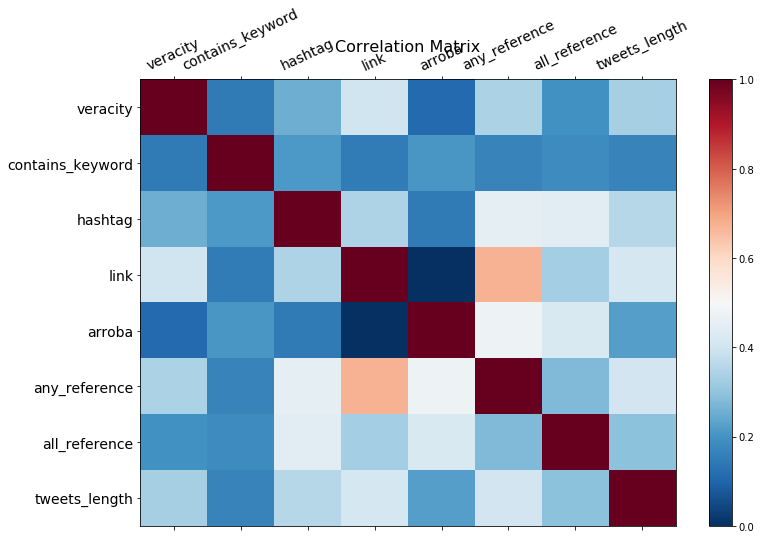

In [426]:
f = plt.figure(figsize=(12,8))
plt.matshow(numeric_values_tweets.corr(), fignum=f.number)
plt.xticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14, rotation=25)
plt.yticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14)
my_cmap2=sns.diverging_palette(170, 250, as_cmap=True)

cb = plt.colorbar(cm.ScalarMappable(cmap='RdBu_r'))
plt.imshow(numeric_values_tweets.corr(),aspect='auto',cmap='RdBu_r')                   
plt.title('Correlation Matrix', fontsize=16);
plt.show()


######  Estudiando la correlacion de estas variables se encontro que no hay una relacion entre la veracidad(veracity) y cualquiera de las otras variables. 

In [76]:
corr = numeric_values_tweets.corr()
corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
veracity,1.000000,-0.069997,0.065779,0.247842,-0.116815,0.171698,-0.009779,0.163956
contains_keyword,-0.069997,1.000000,0.012605,-0.068694,0.005356,-0.046024,-0.021972,-0.046062
hashtag,0.065779,0.012605,1.000000,0.178247,-0.072284,0.310624,0.304019,0.193380
link,0.247842,-0.068694,0.178247,1.000000,-0.255045,0.590571,0.159905,0.261796
arroba,-0.116815,0.005356,-0.072284,-0.255045,1.000000,0.338366,0.279093,0.026524
any_reference,0.171698,-0.046024,0.310624,0.590571,0.338366,1.000000,0.094436,0.254116
all_reference,-0.009779,-0.021972,0.304019,0.159905,0.279093,0.094436,1.000000,0.116468
tweets_length,0.163956,-0.046062,0.193380,0.261796,0.026524,0.254116,0.116468,1.000000


In [77]:
16557.93

16557.93

###  Analisis gramatical con herramientas de NLP.

In [143]:
import spacy as sp

In [144]:
nlp = sp.load("en_core_web_sm")


In [145]:
textcat = nlp.create_pipe("textcat")

In [146]:
textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True})


In [148]:
from spacy.pipeline import TextCategorizer


In [155]:
textcat = TextCategorizer(nlp.vocab)

In [156]:
doc = nlp("This is a sentence.")

In [ ]:
from spacy.tokens import Doc


In [157]:
textcat(doc)

ValueError: [E109] Model for component 'textcat' not initialized. Did you forget to load a model, or forget to call begin_training()?

In [158]:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)


In [160]:
nlp("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.").sentiment

0.0

In [169]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length,sentiment
count,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.0
mean,5438.943365,0.433788,0.792890,0.234670,0.525699,0.266777,0.760645,0.027560,102.975472,0.0
std,3104.870949,0.495631,0.405263,0.423822,0.499374,0.442305,0.426719,0.163719,32.357604,0.0
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.0
25%,2766.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000,0.0
50%,5380.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,109.000000,0.0
75%,8098.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,134.000000,0.0
max,10834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,157.000000,0.0


In [108]:
import language_check

In [114]:
tool = language_check.LanguageTool('en-US')

####  Con esto podemos sacar la cantidad de Nouns que tenemos.

In [121]:
text = "Another movie theater attack..close to home this time. Thankful for no casualties. Life will go on because we cannot allow evil to win!	"

In [178]:
not len(tool.check(text))

False

In [124]:
tool.check(text)

[Match({'fromy': 0, 'fromx': 28, 'toy': 0, 'tox': 30, 'ruleId': 'DOUBLE_PUNCTUATION', 'msg': 'Two consecutive dots', 'replacements': ['.'], 'context': 'Another movie theater attack..close to home this time. Thankful for no...', 'contextoffset': 28, 'offset': 28, 'errorlength': 2, 'category': 'Miscellaneous', 'locqualityissuetype': 'typographical'})]

In [189]:
grammar_error = tool.check(text)

In [193]:
for match in grammar_error:
    print(match.ruleId)

MORFOLOGIK_RULE_EN_US
MORFOLOGIK_RULE_EN_US
MORFOLOGIK_RULE_EN_US
MORFOLOGIK_RULE_EN_US
MORFOLOGIK_RULE_EN_US


In [130]:
text2 = "Another movie theater attack to close to home this time. Thankful for no casualties. Life will go on because we cannot allow evil to win!	"

In [131]:
tool.check(text2)

[]

In [132]:
len(tool.check(text2))

0

In [137]:
tool.check?

In [179]:
en_tweets_with_keyword['grammatical_errors'] = en_tweets_with_keyword.text.apply(lambda x : tool.check(str(x)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
en_tweets_with_keyword['amount_of_grammatical_errors'] = en_tweets_with_keyword['grammatical_errors'].apply(lambda x : len(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [592]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length,sentiment,grammatical_errors,amount_of_grammatical_errors,rule_id
7047,10098,typhoon,"anzio,italy",Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/0XCb7yeqmw,1,en,1,0,1,0,1,0,140,0.0,"[Line 1, column 14, Rule ID: MORFOLOGIK_RULE_EN_US\nMessage: Possible spelling mistake found\nMap: Typhoon Soudelor's predicted path as it approac...",2,"[(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]"
1579,2280,cliff%20fall,NaN,Currently want to drive my car off a cliff and fall to my death.,0,en,0,0,0,0,0,0,64,0.0,[],0,[]
6771,9703,tornado,,Maybe that's what happens when a tornado meets a volcano,1,en,1,0,0,0,0,0,56,0.0,[],0,[]
6049,8646,sinkhole,Trinidad and Tobago,nothing surprises me anymore and i am sure there is more to come... http://t.co/zdpvQmEezS,0,en,0,0,1,0,1,0,90,0.0,[],0,[]
7053,10106,typhoon,Dhaka,Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... http://t.co/lEYJwNnAH8,1,en,1,0,1,0,1,0,136,0.0,"[Line 1, column 29, Rule ID: MORFOLOGIK_RULE_EN_US\nMessage: Possible spelling mistake found\nObama Declares Disaster for Typhoon-Devastated Saipa...",3,"[(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]"


In [356]:
en_tweets_with_keyword.groupby(['veracity']).agg({'amount_of_grammatical_errors':{'sum','count','mean'}})

amount_of_grammatical_errors                
                                  sum      mean count
veracity                                             
0                                7889  1.919932  4109
1                                5638  1.790978  3148

In [378]:
amout_of_gramatical_errors = en_tweets_with_keyword.groupby(['veracity']).agg({'amount_of_grammatical_errors':{'sum','count','mean'}})

In [379]:
level0 = amout_of_gramatical_errors.columns.get_level_values(0)

In [380]:
level1 = amout_of_gramatical_errors.columns.get_level_values(1)

In [381]:
amout_of_gramatical_errors.columns = level1

In [396]:
amout_of_gramatical_errors[['sum','count']].T

veracity,0,1
sum,7889,5638
count,4109,3148


In [392]:
grammatical_errors_analitics = amout_of_gramatical_errors[['sum','count']].T

In [397]:
grammatical_errors_analitics.columns = ["Falso","Verdadero"]

Text(0, 0.5, 'Cantidad de tweets')

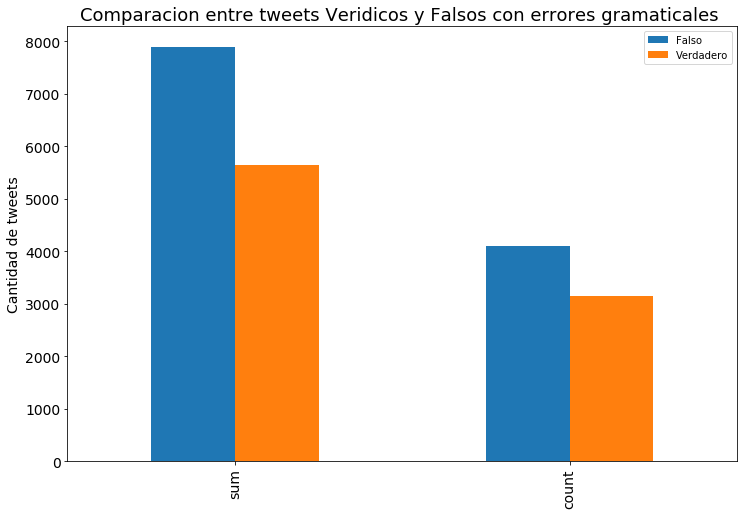

In [399]:
grammatical_errors_analitics.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Comparacion entre tweets Veridicos y Falsos con errores gramaticales ',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14)


In [239]:
en_tweets_with_keyword['grammatical_errors'].apply(lambda x : [(match.ruleId,1) for match in x] ).sample(5)

1947                                                                                      []
5966    [(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]
3598                                                                                      []
6230                                                                                      []
2882          [(MORFOLOGIK_RULE_EN_US, 1), (WHITESPACE_RULE, 1), (MORFOLOGIK_RULE_EN_US, 1)]
Name: grammatical_errors, dtype: object

In [276]:
def ruleSelector(row) :
    return [ (x.ruleId,row.veracity) for x in row.grammatical_errors ]
    
            

In [277]:
en_tweets_with_keyword.apply(lambda row : ruleSelector(row) ,axis=1).sample(5)

846                                                     [(HE_VERB_AGR, 0), (MORFOLOGIK_RULE_EN_US, 0), (MORFOLOGIK_RULE_EN_US, 0)]
7322    [(MORFOLOGIK_RULE_EN_US, 0), (WHITESPACE_RULE, 0), (WHITESPACE_RULE, 0), (MORFOLOGIK_RULE_EN_US, 0), (WHITESPACE_RULE, 0)]
5582                                                                                                                            []
4388                                                                                                                            []
2921                                                                                                  [(MORFOLOGIK_RULE_EN_US, 1)]
dtype: object

In [279]:
en_tweets_with_keyword['rule_id'] = en_tweets_with_keyword['grammatical_errors'].apply(lambda x : match.ruleId for match in x )

NameError: name 'x' is not defined

In [280]:
rulesIdSerie = en_tweets_with_keyword['rule_id']

In [281]:
rulesIdSerie.sample(5)

3276                                                            [(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]
471     [(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]
2191                                                                                                                    [(MORFOLOGIK_RULE_EN_US, 1)]
1125                                      [(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1), (WHITESPACE_RULE, 1)]
5177                                                                                        [(MORFOLOGIK_RULE_EN_US, 1), (MORFOLOGIK_RULE_EN_US, 1)]
Name: rule_id, dtype: object

In [282]:
rulesIdSerie.apply(pd.Series).stack().groupby(lambda x : x[1]).agg('sum')

0     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE...
1     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE...
2     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, EN_UNPAIRED_BRACKETS, 1, MORFOLOGIK_RULE_...
3     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE...
4     (MORFOLOGIK_RULE_EN_US, 1, UPPERCASE_SENTENCE_START, 1, MORFOLOGIK_RULE_EN_US, 1, COMMA_PARENTHESIS_WHITESPACE, 1, MORFOLOGIK_RULE_EN_US, 1, MORFO...
5     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE...
6     (MORFOLOGIK_RULE_EN_US, 1, MORFOLOGIK_RULE_EN_US, 1, MORFO

In [283]:
col = ['tweetId','level_1','description']

In [284]:
en_tweets_with_keyword.apply(lambda row : ruleSelector(row) ,axis=1).apply(pd.Series).stack().reset_index()

,level_0,level_1,0
0,31,0,"(MORFOLOGIK_RULE_EN_US, 1)"
1,32,0,"(MORFOLOGIK_RULE_EN_US, 0)"
2,32,1,"(MORFOLOGIK_RULE_EN_US, 0)"
3,33,0,"(MORFOLOGIK_RULE_EN_US, 1)"
4,33,1,"(MORFOLOGIK_RULE_EN_US, 1)"
...,...,...,...
13522,7580,4,"(MORFOLOGIK_RULE_EN_US, 0)"
13523,7581,0,"(MORFOLOGIK_RULE_EN_US, 0)"
13524,7582,0,"(MORFOLOGIK_RULE_EN_US, 0)"
13525,7582,1,"(MORFOLOGIK_RULE_EN_US, 0)"


In [285]:
transformDataSet = en_tweets_with_keyword.apply(lambda row : ruleSelector(row) ,axis=1).apply(pd.Series).stack().reset_index()

In [286]:
transformDataSet.columns = col

In [287]:
transformDataSet

,tweetId,level_1,description
0,31,0,"(MORFOLOGIK_RULE_EN_US, 1)"
1,32,0,"(MORFOLOGIK_RULE_EN_US, 0)"
2,32,1,"(MORFOLOGIK_RULE_EN_US, 0)"
3,33,0,"(MORFOLOGIK_RULE_EN_US, 1)"
4,33,1,"(MORFOLOGIK_RULE_EN_US, 1)"
...,...,...,...
13522,7580,4,"(MORFOLOGIK_RULE_EN_US, 0)"
13523,7581,0,"(MORFOLOGIK_RULE_EN_US, 0)"
13524,7582,0,"(MORFOLOGIK_RULE_EN_US, 0)"
13525,7582,1,"(MORFOLOGIK_RULE_EN_US, 0)"


In [319]:
gramaticalErrorsFromText = transformDataSet[['tweetId','description']]

In [328]:
gramaticalErrorsFromText.describe()

,tweetId
count,6762.000000
mean,3797.733954
std,2154.317534
min,31.000000
25%,1963.250000
50%,3833.500000
75%,5642.000000
max,7582.000000


In [340]:
reduceGramaticalErrorsFromText = gramaticalErrorsFromText.drop_duplicates()

In [341]:
reduceGramaticalErrorsFromText.sample()

,tweetId,description
12694,7060,"(COMMA_PARENTHESIS_WHITESPACE, 0)"


In [504]:
reduceGramaticalErrorsFromText['ruleId'] = reduceGramaticalErrorsFromText.description.apply(lambda x : x[0] )

In [505]:
reduceGramaticalErrorsFromText['veracity'] = reduceGramaticalErrorsFromText.description.apply(lambda x : x[1] )

In [528]:
 agrupedGramaticalsErros = reduceGramaticalErrorsFromText[['ruleId','veracity']].groupby(['ruleId','veracity']).agg('size').unstack().dropna()

In [531]:
agrupedGramaticalsErros.columns = ['Falso','Verdadero']

In [565]:
agrupedGramaticalsErros.sample(5)

,Falso,Verdadero
ruleId,,
THIS_NNS,2.0,2.0
LITTLE_BIT,1.0,2.0
WHITESPACE_RULE,275.0,242.0
YOUR_NN,10.0,1.0
NON3PRS_VERB,12.0,1.0


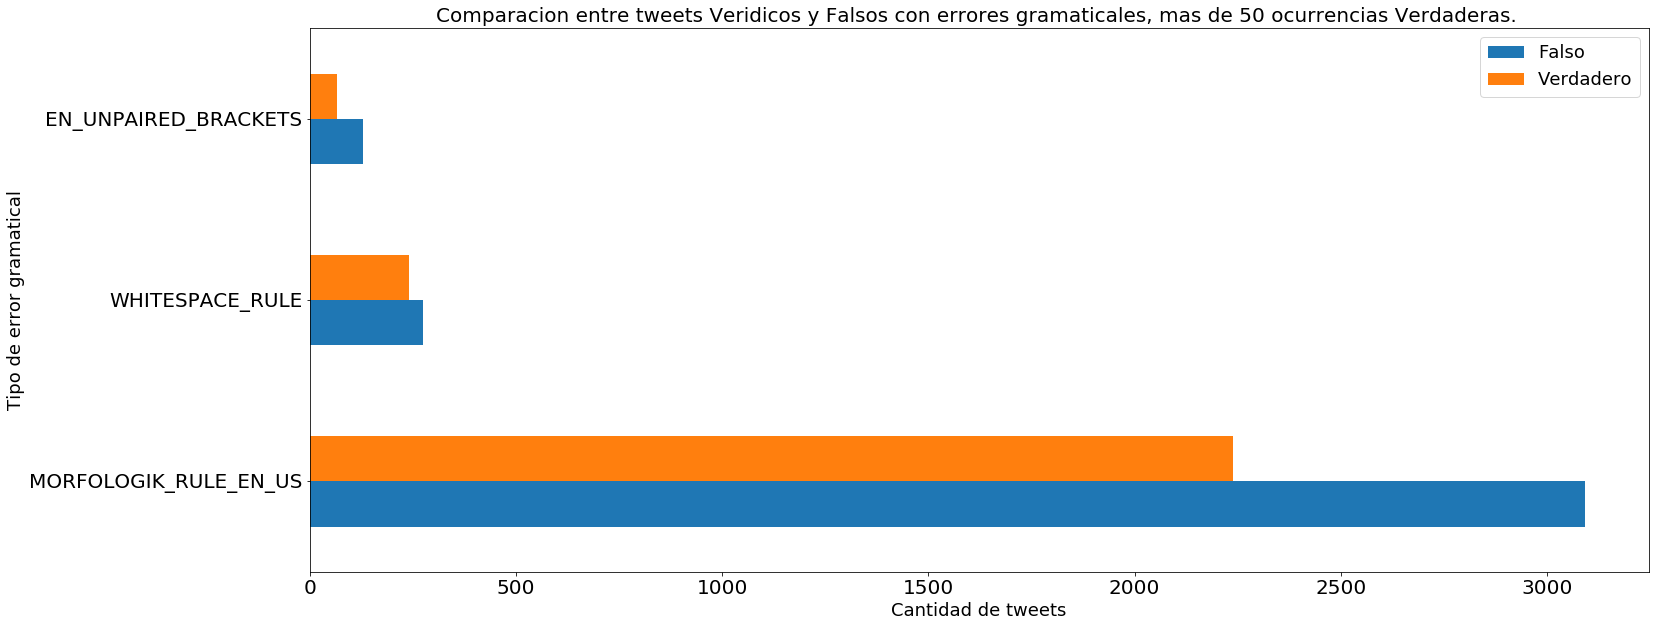

In [596]:
agrupedGramaticalsErros[(agrupedGramaticalsErros['Falso'] > 50) & (agrupedGramaticalsErros['Verdadero'] > 50) ]\
.sort_values(by='Verdadero', ascending=False)\
.plot(kind='barh',linewidth=5,figsize=(24,10),fontsize=20,width = 0.50)
ax=plt.gca()
ax.set_title('Comparacion entre tweets Veridicos y Falsos con errores gramaticales, mas de 50 ocurrencias Verdaderas. ',fontsize=20)
ax.set_xlabel('Cantidad de tweets',fontsize=18)
ax.set_ylabel('Tipo de error gramatical',fontsize=18)
ax.legend(fontsize=18)

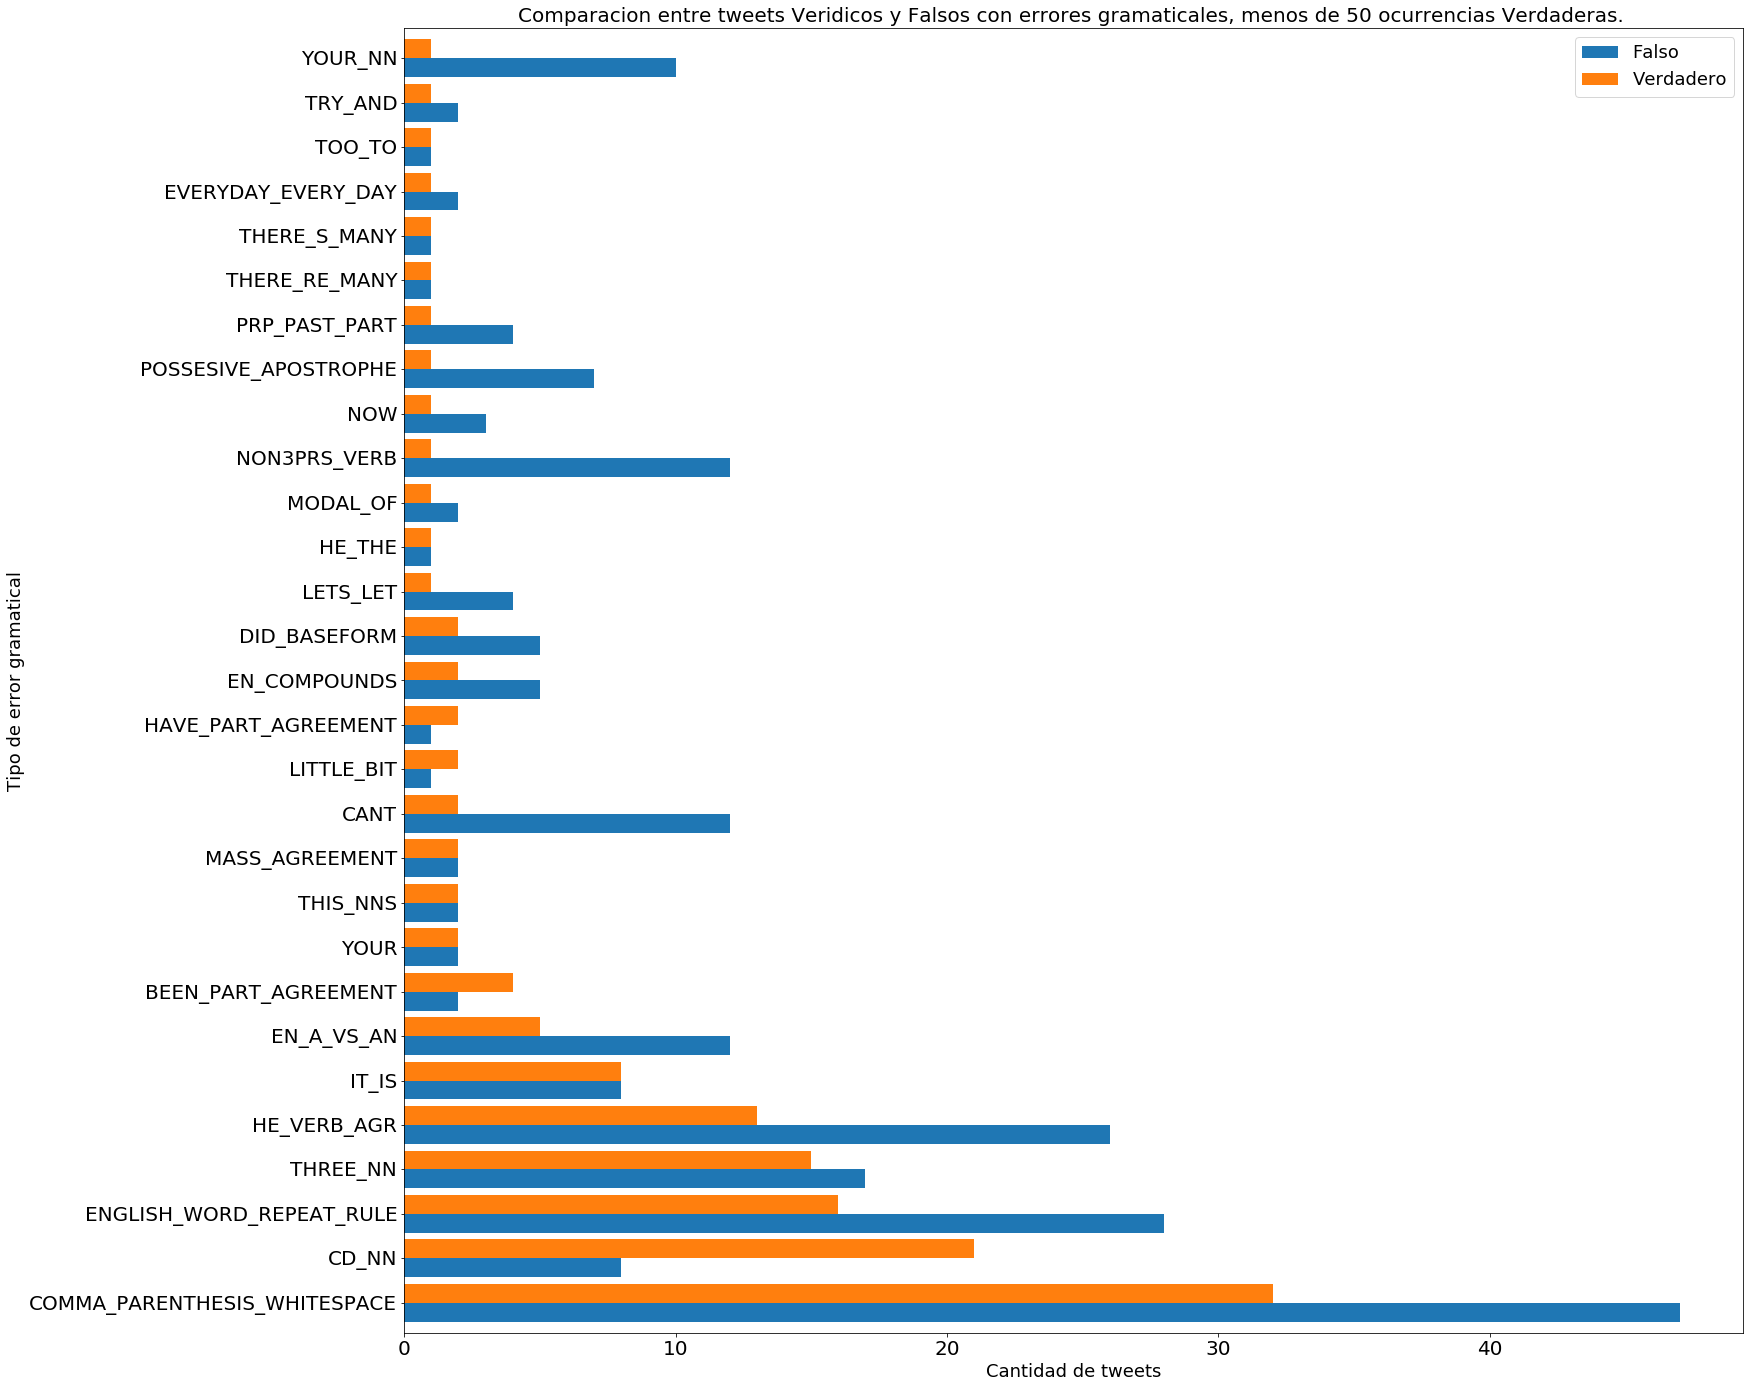

In [595]:
agrupedGramaticalsErros[(agrupedGramaticalsErros['Falso'] < 50) & (agrupedGramaticalsErros['Verdadero'] < 50) ]\
.sort_values(by='Verdadero', ascending=False)\
.plot(kind='barh',linewidth=5,figsize=(24,24),fontsize=20,width = 0.85)
ax=plt.gca()
ax.set_title('Comparacion entre tweets Veridicos y Falsos con errores gramaticales, menos de 50 ocurrencias Verdaderas. ',fontsize=20)
ax.set_xlabel('Cantidad de tweets',fontsize=18)
ax.set_ylabel('Tipo de error gramatical',fontsize=18)
ax.legend(fontsize=18)

In [507]:
groupedGrammarErrorsByVeracity = reduceGramaticalErrorsFromText[['ruleId','veracity']].groupby(['ruleId','veracity']).agg('size').reset_index()

In [508]:
groupedGrammarErrorsByVeracity

,ruleId,veracity,0
0,ABOUT_ITS_NN,1,1
1,AFRAID_OF_HEIGHT,0,2
2,ALSO_SENT_END,0,2
3,AND_THAN,0,1
4,ANY_BODY,0,2
...,...,...,...
108,WRONG_APOSTROPHE,0,1
109,YOUR,0,2
110,YOUR,1,2
111,YOUR_NN,0,10


In [509]:
groupedGrammarErrorsByVeracity.columns = ['ruleId','veracity','count']

In [512]:
groupedGrammarErrorsByVeracity.sort_values(by='count', ascending=False).head(30)

,ruleId,veracity,count
66,MORFOLOGIK_RULE_EN_US,0,3092
67,MORFOLOGIK_RULE_EN_US,1,2238
105,WHITESPACE_RULE,0,275
106,WHITESPACE_RULE,1,242
102,UPPERCASE_SENTENCE_START,0,145
34,EN_UNPAIRED_BRACKETS,0,130
35,EN_UNPAIRED_BRACKETS,1,67
22,DOUBLE_PUNCTUATION,0,54
16,COMMA_PARENTHESIS_WHITESPACE,0,47
23,DOUBLE_PUNCTUATION,1,47


In [495]:
groupedGrammarErrorsByVeracity[(1000 > groupedGrammarErrorsByVeracity['count'] ) & (groupedGrammarErrorsByVeracity['count']  > 10 )]\
.groupby(['veracity','ruleId'])

.sort_values(by='quantity', ascending=False).head(30)

sum_of_columns = en_tweets_with_keyword.groupby(['veracity']).\
agg({'all_reference':['sum'],
     'arroba':['sum'],
     'contains_keyword':['sum'],
     'hashtag':['sum'],
     'link':['sum'],
     'any_reference':['sum']
    })

In [ ]:
en_tweets_with_keyword[['lan','grammatical_errors','text']]

In [113]:
len([chunk.text for chunk in  doc.noun_chunks])



15

In [84]:
print ([chunk.text for chunk in doc.noun_chunks])

['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']


In [85]:
len([token.lemma_ for token in doc if token.pos_ != "VERB"])

55

In [86]:
print([token.lemma_ for token in doc if token.pos_ != "VERB"])

['when', 'Sebastian', 'Thrun', 'on', 'self', '-', 'car', 'at', 'Google', 'in', '2007', ',', 'few', 'people', 'outside', 'of', 'the', 'company', '-PRON-', 'seriously', '.', '"', '-PRON-', '-PRON-', 'very', 'senior', 'ceo', 'of', 'major', 'american', 'car', 'company', '-PRON-', 'hand', 'and', 'away', 'because', '-PRON-', 'be', 'not', 'worth', 'to', ',', '"', 'Thrun', ',', 'in', 'an', 'interview', 'with', 'Recode', 'earlier', 'this', 'week', '.']


In [88]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian NORP
Google ORG
2007 DATE
American NORP
Recode ORG
earlier this week DATE


In [89]:
pip install language-check

Note: you may need to restart the kernel to use updated packages.


In [90]:
import language_check

In [91]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
2916,4189,drown,"Layang-Layang, Perak",Drown by Bring Me the Horizon (at Information Resources Centre (UTP)) ÛÓ https://t.co/7vSqQSvGNI,0,en,1,0,1,0,1,0,97
4957,7065,meltdown,Proudly frozen Canuck eh !!,@JustinTrudeau \n\nMost respected in world\nBest job recovery G7 and G20\nBest led during 2008 world meltdown\n\nWhat exactly have you done ??,0,en,1,0,0,1,1,0,136
2714,3899,devastated,Manchester,@Meganbee92 @kadiegrr im just devastated that when it ends I will no longer see tyler blackburns face on pll xxx,0,en,1,0,0,1,1,0,113
488,706,attacked,atx,I cant believe a fucking cis female is going to somehow claim to be offended over a transgendered female who's been attacked by media,0,en,1,0,0,0,0,0,133
3719,5287,fear,Brazil,When the world say finish God says: don't fear - http://t.co/Q5qCoAo8jP #ChooseGod #RestoringPaths,0,en,1,1,1,0,1,0,98


In [120]:
doc = """@JustinTrudeau  
Most respected in world
Best led during 2008 world meltdown
What exactly have you done ??"""

In [129]:
from spacy.lang.en import English


nlp = English()



In [130]:
print (doc)

@JustinTrudeau  
Most respected in world
Best job recovery G7 and G20
Best led during 2008 world meltdown
What exactly have you done ??


In [131]:
my_doc = nlp(doc)

In [137]:
textcat = TextCategorizer(nlp.vocab)
doc = nlp("This is a sentence.")
# This usually happens under the hood
processed = textcat(doc)
NAME

NameError: name 'TextCategorizer' is not defined

In [135]:
token_list = []

for token in my_doc:
    token_list.append(token.text)



In [136]:
print(token_list)

['@JustinTrudeau', ' \n', 'Most', 'respected', 'in', 'world', '\n', 'Best', 'job', 'recovery', 'G7', 'and', 'G20', '\n', 'Best', 'led', 'during', '2008', 'world', 'meltdown', '\n', 'What', 'exactly', 'have', 'you', 'done', '?', '?']


In [ ]:
en_tweets_with_keyword['contain_grammar_error'] = en_tweets_with_keyword.apply(lambda x : )